In [1]:
import os

from dotenv import load_dotenv, find_dotenv

dotenv_path = find_dotenv()
print(f"Target .env path: {dotenv_path}")  # 이 경로가 실제 파일 위치와 맞는지 확인

# 파일을 직접 로드하고 결과(True/False) 확인
loaded = load_dotenv(dotenv_path, override=True)  # override 추가
print(f"Loading successful: {loaded}")

print(f"API Key: {os.getenv('OPENAI_API_KEY')[:10] if os.getenv('OPENAI_API_KEY') else 'None'}")

Target .env path: /Users/kimjunghyeon/Desktop/workspace/ai-agent/.env
Loading successful: True
API Key: sk-proj-Hi


In [2]:
from langchain_openai import ChatOpenAI

query = 'agent키 세팅 테스트'

# 올바른 모델명 사용 (gpt-4o-mini)
llm = ChatOpenAI(model="gpt-4o-mini")
response = llm.invoke(query)
print(response.content)

안녕하세요! Agent 키 세팅 테스트에 대해 어떻게 도와드릴까요? 필요한 정보나 도움이 필요한 구체적인 부분에 대해 말씀해 주시면 최선을 다해 도와드리겠습니다.


In [3]:
from typing import Annotated
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph import add_messages


class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]


In [4]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [5]:
def generate(state: AgentState) -> AgentState:
    messages = state["messages"]
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}

In [6]:
from langgraph.graph import START, END

graph_builder.add_node('generate', generate)
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [8]:
graph = graph_builder.compile()

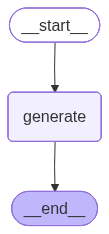

In [9]:
graph

In [10]:
from langchain_core.messages import HumanMessage

initial_state = {'messages': [
    HumanMessage(query)
]}

graph.invoke(initial_state)

{'messages': [AIMessage(content='agent 키 세팅 테스트와 관련하여 도움이 필요하신가요? 어떤 특정한 내용이나 기능이 필요한지 좀 더 구체적으로 말씀해 주시면, 보다 정확한 정보를 제공해 드리겠습니다. 예를 들어, 사용하는 플랫폼이나 기술 스택, 필요한 특정 설정 등에 대해 알려주시면 좋습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 12, 'total_tokens': 78, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_1590f93f9d', 'id': 'chatcmpl-D5NmfRXoBNkqoLIFQi1O3CfeOfZ0d', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c26ad-9ab7-7980-9202-ba45e3280a95-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 12, 'output_tokens': 66, 'total_tokens': 78, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': 